# Index Tracking with Gurobi

This Python notebook is part of the webinar [Proven Techniques for Solving Financial Problems with Gurobi](https://www.gurobi.com/events/proven-techniques-for-solving-financial-problems-with-gurobi/).

The sequence of python code will:
1. Import stock data from yahoo finance
2. Clean up the data and change format
3. Perform an index tracking experiment

## Importing Data from YFinance

- Adjusted Stock price data for SP100 constitutents 
- Data from 2010 to 2022

In [1]:
print("oi")

oi


In [1]:
from utils.data_import import get_sp100, get_ibv

# Options
FIRST_DATE  = "2020-01-01"
LAST_DATE   = "2025-01-01"

df_prices_sp = get_sp100(FIRST_DATE,LAST_DATE)

df_prices_sp.head()

Fetching SP100 components
	-> got 101 tickers



c:\Users\joaov\Documents\bootcamp-ds-4ed\utils\data_import.py:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=FIRST_DATE, end=LAST_DATE)["Close"]
[*********************100%***********************]  101 of 102 completed

2 Failed downloads:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['HON']: Timeout('Failed to perform, curl: (28) Operation timed out after 10006 milliseconds with 0 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
[*********************100%***********************]  101 of 102 completed

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM,^SP100
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.468269,69.823448,78.208054,192.514984,334.429993,44.517937,49.099998,199.607391,195.522354,94.900497,...,267.026398,160.492859,91.948639,46.150040,183.186203,43.349495,46.052399,36.508106,53.661713,1458.130005
2020-01-03,71.763702,69.160667,77.254601,192.194366,331.809998,44.173908,48.599998,198.252350,195.616440,93.748497,...,264.324188,159.356964,91.893509,45.612133,181.729370,42.887939,45.769669,36.185810,53.230305,1446.479980
2020-01-06,72.335571,69.706497,77.659370,190.939392,333.709991,44.208313,48.389999,199.773682,195.565140,95.143997,...,266.159180,157.992157,91.484131,44.988491,181.336334,42.795635,45.495491,36.112144,53.639011,1452.810059
2020-01-07,71.995354,69.308838,77.227631,186.816986,333.390015,43.958885,48.250000,197.894821,191.397949,95.343002,...,264.552399,156.794662,91.326645,44.559734,180.857117,42.319893,45.118504,35.777565,53.200027,1447.359985
2020-01-08,73.153511,69.800079,77.542427,187.183380,337.869995,44.474941,47.830002,198.044479,193.057983,94.598503,...,270.130249,158.511658,91.846306,44.466183,183.953033,42.397999,45.255592,35.654793,52.397755,1455.489990


In [2]:
df_prices_ibv = get_ibv(FIRST_DATE,LAST_DATE)

df_prices_ibv.head()

Fetching IBOV components
	-> got 88 tickers



c:\Users\joaov\Documents\bootcamp-ds-4ed\utils\data_import.py:102: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=FIRST_DATE, end=LAST_DATE)["Close"]
[*********************100%***********************]  89 of 89 completed

15 Failed downloads:
['JBSS3.SA', 'BIDI11.SA', 'SULA11.SA', 'ENBR3.SA', 'MRFG3.SA', 'VIIA3.SA', 'CRFB3.SA', 'SOMA3.SA', 'BRFS3.SA', 'GOLL4.SA', 'NTCO3.SA', 'BRML3.SA', 'CIEL3.SA', 'CCRO3.SA', 'LCAM3.SA']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,14.743880,28.379301,6333.258789,NaN,58.799999,12.181202,17.415005,18.467066,19.764902,22.437407,...,21.407814,9.829418,7.763107,31.718035,19.840103,NaN,16.607283,16.119907,41.797302,118573.0
2020-01-03,14.536547,28.379301,6247.752441,NaN,56.759998,11.830160,17.385872,18.178905,19.774902,22.190067,...,21.862904,9.714231,7.683075,31.484510,19.723928,NaN,16.800066,15.914067,40.921127,117707.0
2020-01-06,14.605657,27.935064,6208.886719,NaN,55.000000,11.716745,17.156044,18.074636,19.421684,22.555187,...,21.364475,9.503053,7.539018,31.297688,18.736443,NaN,16.638262,15.955234,41.707897,116878.0
2020-01-07,14.636374,28.570940,6193.339844,NaN,56.820000,12.094793,17.026566,17.767040,19.084286,22.566965,...,21.454256,9.714231,7.611047,31.525377,18.710627,NaN,17.006618,16.078747,40.930065,116662.0
2020-01-08,14.567264,28.884520,6275.930664,NaN,56.919998,12.062390,16.871181,17.495951,18.789059,22.555187,...,21.166340,9.637438,7.515008,31.531212,18.620268,NaN,17.178755,15.470351,40.688667,116247.0


## Cleaning and Splitting the Data

In [3]:
from utils.data_clean import clean_data

THRESH_VALID_DATA = 0.95 # defines where to cut stocks with missing data
PERC_SIZE_TRAIN = 0.80   # defines the size of train dataset (in %)

df_ret_sp, df_train_sp, df_test_sp  = clean_data(
    df_prices_sp, 
    thresh_valid_data = THRESH_VALID_DATA,
    size_train = PERC_SIZE_TRAIN
)

df_ret_ibv, df_train_ibv, df_test_ibv  = clean_data(
    df_prices_ibv, 
    thresh_valid_data = THRESH_VALID_DATA,
    size_train = PERC_SIZE_TRAIN
)

print("Data Cleaned")
print("Training and testing data separated")

Data Cleaned
Training and testing data separated


In [4]:
from utils.data_process import find_quarters

quarters_data_sp = find_quarters(df_test_sp)

for q, df_part in quarters_data_sp.items():
    print(f"{q}: {len(df_part)} observações, de {df_part.index.min().date()} a {df_part.index.max().date()}")

Q1: 62 observações, de 2024-01-02 a 2024-04-01
Q2: 63 observações, de 2024-04-02 a 2024-07-01
Q3: 63 observações, de 2024-07-02 a 2024-09-30
Q4: 64 observações, de 2024-10-01 a 2024-12-31


In [6]:
quarters_data_ibv = find_quarters(df_test_ibv)

for q, df_part in quarters_data_ibv.items():
    print(f"{q}: {len(df_part)} observações, de {df_part.index.min().date()} a {df_part.index.max().date()}")

Q1: 62 observações, de 2024-01-04 a 2024-04-03
Q2: 62 observações, de 2024-04-04 a 2024-07-02
Q3: 64 observações, de 2024-07-03 a 2024-09-30
Q4: 61 observações, de 2024-10-01 a 2024-12-30


## Constrained Index Tracking

$
\begin{array}{llll}
  & \min              & \frac{1}{T} \; \sum_{t = 1}^{T} \left(\sum_{i = 1}^{I} \; w_{i} \: \times \: r_{i,t} - R_{t}\right)^2 \\
  & \text{subject to} &   \sum_{i = 1}^{I} w_{i}  = 1  \\
  &                   &   \sum_{i = 1}^{I} z_{i} \leq K \\
  &                   & w_i \geq 0 \\
  &                   & z_i \in {0, 1}
\end{array}
$

  

$
\begin{array}{lllll}
& where: \\
& \\
& w_i  &: \text{Weight of asset i in index} \\
& z_i &: \text{Binary variable (0, 1) that decides wheter asset i is in portfolio} \\
& R_{t} &: \text{Returns of tracked index (e.g. SP500) at time t} \\
& r_{i,j} &: \text{Return of asset i at time t}
\end{array}
$

In [5]:
from utils.data_process import index_tracking

#--- Configuração da Simulação ---
scenarios = [5, 10, 20, 30] # Testar carteiras com 5, 10, 20 e 40 ativos
results_store = {} # Dicionário para guardar os resultados

print(f"--- Iniciando Testes de Index Tracking (SP100) ---")

for k in scenarios:
    print(f"\n>> Rodando Otimização para K = {k} ativos máximos...")
    
    port_ret, mkt_ret = index_tracking(
        quarters_data=quarters_data_sp, # Usando dados SP100
        mkt_index="^SP100",
        max_assets=k,
        current_train=df_train_sp,
        df_test=df_test_sp,
        time_limit=15 # 60 segundos por trimestre
    )
    
    results_store[k] = port_ret

# Salva o retorno do mercado (é o mesmo para todos os cenários)
benchmark_ret = mkt_ret
print("\n--- Simulação Finalizada ---")

--- Iniciando Testes de Index Tracking (SP100) ---

>> Rodando Otimização para K = 5 ativos máximos...
Restricted license - for non-production use only - expires 2027-11-29

>>> Carteira Otimizada: Q1
Total de ativos selecionados: 5
  MSFT       : 23.2802%
  JNJ        : 22.5565%
  JPM        : 21.9867%
  AAPL       : 19.6611%
  AMZN       : 12.5156%
------------------------------

>>> Carteira Otimizada: Q2
Total de ativos selecionados: 5
  MSFT       : 24.3622%
  KO         : 24.3244%
  JPM        : 19.4228%
  AAPL       : 18.9823%
  AMZN       : 12.9084%
------------------------------

>>> Carteira Otimizada: Q3
Total de ativos selecionados: 5
  MSFT       : 24.7113%
  KO         : 23.3867%
  JPM        : 19.4450%
  AAPL       : 19.2990%
  AMZN       : 13.1580%
------------------------------

>>> Carteira Otimizada: Q4
Total de ativos selecionados: 5
  MSFT       : 24.6426%
  KO         : 23.2752%
  JPM        : 19.4488%
  AAPL       : 19.4364%
  AMZN       : 13.1970%
--------------

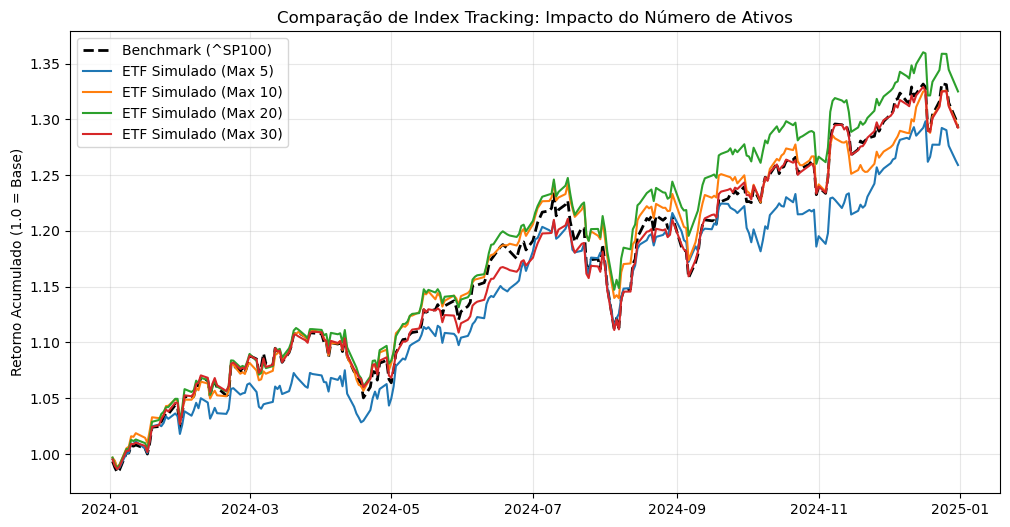


--- Tabela de Performance ---


,Tracking Error,Correlação,Retorno Total
Ativos (K),,,
5,7.33%,0.8501,25.90%
10,4.43%,0.9480,29.30%
20,3.10%,0.9770,32.50%
30,2.90%,0.9812,29.26%


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# DataFrame para consolidar métricas
metrics_list = []

plt.figure(figsize=(12, 6))

# 1. Plota o Benchmark
cum_bench = (1 + benchmark_ret).cumprod()
plt.plot(cum_bench.index, cum_bench, label='Benchmark (^SP100)', color='black', linewidth=2, linestyle='--')

for k in scenarios:
    p_ret = results_store[k]
    
    # Cria dataframe temporário para alinhar dados (tratamento de datas)
    df_comp = pd.DataFrame({'Port': p_ret, 'Bench': benchmark_ret}).dropna()
    
    # --- Métricas ---
    # Tracking Error (Desvio padrão da diferença dos retornos, anualizado)
    tracking_diff = df_comp['Port'] - df_comp['Bench']
    te = tracking_diff.std() * np.sqrt(252)
    
    # Correlação
    corr = df_comp['Port'].corr(df_comp['Bench'])
    
    # Retorno Total
    total_ret = (1 + df_comp['Port']).prod() - 1
    
    # Adiciona à lista
    metrics_list.append({
        'Ativos (K)': k,
        'Tracking Error': f"{te*100:.2f}%",
        'Correlação': f"{corr:.4f}",
        'Retorno Total': f"{total_ret*100:.2f}%"
    })
    
    # 2. Plota o Cenário
    cum_port = (1 + p_ret).cumprod()
    plt.plot(cum_port.index, cum_port, label=f'ETF Simulado (Max {k})')

# Configuração do Gráfico
plt.title('Comparação de Index Tracking: Impacto do Número de Ativos')
plt.ylabel('Retorno Acumulado (1.0 = Base)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Exibir Tabela de Métricas
df_metrics = pd.DataFrame(metrics_list).set_index('Ativos (K)')
print("\n--- Tabela de Performance ---")
display(df_metrics)

In [12]:
#--- Configuração da Simulação ---
results_store_ibv = {} # Dicionário para guardar os resultados

print(f"--- Iniciando Testes de Index Tracking (BVSP) ---")

for k in scenarios:
    print(f"\n>> Rodando Otimização para K = {k} ativos máximos...")
    
    port_ret_ibv, mkt_ret_ibv = index_tracking(
        quarters_data=quarters_data_ibv, # Usando dados SP100
        mkt_index="^BVSP",
        max_assets=k,
        current_train=df_train_ibv,
        df_test=df_test_ibv,
        time_limit=15 # 60 segundos por trimestre
    )
    
    results_store_ibv[k] = port_ret

# Salva o retorno do mercado (é o mesmo para todos os cenários)
benchmark_ret_ibv = mkt_ret_ibv
print("\n--- Simulação Finalizada ---")

--- Iniciando Testes de Index Tracking (BVSP) ---

>> Rodando Otimização para K = 5 ativos máximos...
Trimestre Q1: 5 ativos.
Trimestre Q2: 5 ativos.
Trimestre Q3: 5 ativos.
Trimestre Q4: 5 ativos.

>> Rodando Otimização para K = 10 ativos máximos...
Trimestre Q1: 10 ativos.
Trimestre Q2: 10 ativos.
Trimestre Q3: 10 ativos.
Trimestre Q4: 10 ativos.

>> Rodando Otimização para K = 20 ativos máximos...
Trimestre Q1: 20 ativos.
Trimestre Q2: 20 ativos.
Trimestre Q3: 20 ativos.
Trimestre Q4: 20 ativos.

>> Rodando Otimização para K = 30 ativos máximos...
Trimestre Q1: 30 ativos.
Trimestre Q2: 30 ativos.
Trimestre Q3: 30 ativos.
Trimestre Q4: 30 ativos.

--- Simulação Finalizada ---


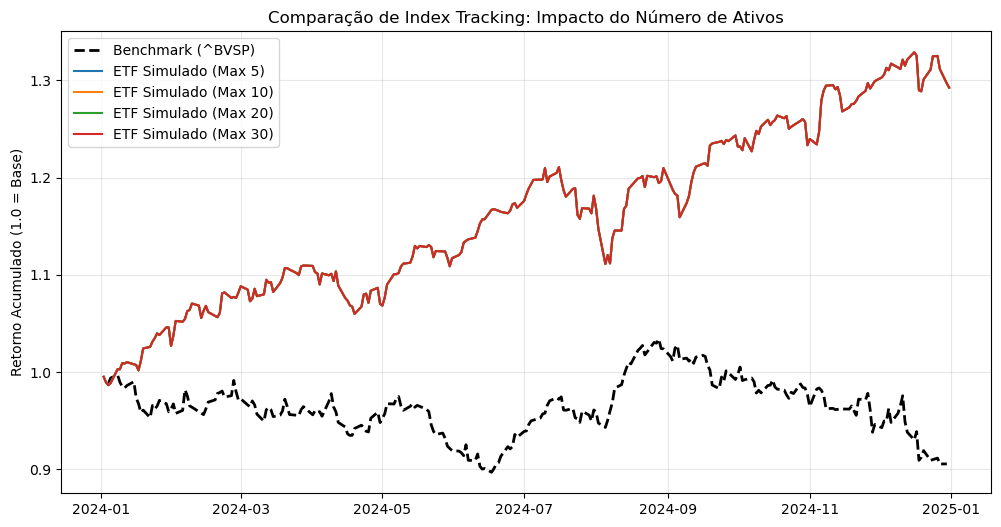


--- Tabela de Performance ---


,Tracking Error,Correlação,Retorno Total
Ativos (K),,,
5,2.90%,0.9812,29.26%
10,2.90%,0.9812,29.26%
20,2.90%,0.9812,29.26%
30,2.90%,0.9812,29.26%


In [13]:
# DataFrame para consolidar métricas
metrics_list = []

plt.figure(figsize=(12, 6))

# 1. Plota o Benchmark
cum_bench = (1 + benchmark_ret_ibv).cumprod()
plt.plot(cum_bench.index, cum_bench, label='Benchmark (^BVSP)', color='black', linewidth=2, linestyle='--')

for k in scenarios:
    p_ret = results_store_ibv[k]
    
    # Cria dataframe temporário para alinhar dados (tratamento de datas)
    df_comp = pd.DataFrame({'Port': p_ret, 'Bench': benchmark_ret}).dropna()
    
    # --- Métricas ---
    # Tracking Error (Desvio padrão da diferença dos retornos, anualizado)
    tracking_diff = df_comp['Port'] - df_comp['Bench']
    te = tracking_diff.std() * np.sqrt(252)
    
    # Correlação
    corr = df_comp['Port'].corr(df_comp['Bench'])
    
    # Retorno Total
    total_ret = (1 + df_comp['Port']).prod() - 1
    
    # Adiciona à lista
    metrics_list.append({
        'Ativos (K)': k,
        'Tracking Error': f"{te*100:.2f}%",
        'Correlação': f"{corr:.4f}",
        'Retorno Total': f"{total_ret*100:.2f}%"
    })
    
    # 2. Plota o Cenário
    cum_port = (1 + p_ret).cumprod()
    plt.plot(cum_port.index, cum_port, label=f'ETF Simulado (Max {k})')

# Configuração do Gráfico
plt.title('Comparação de Index Tracking: Impacto do Número de Ativos')
plt.ylabel('Retorno Acumulado (1.0 = Base)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Exibir Tabela de Métricas
df_metrics = pd.DataFrame(metrics_list).set_index('Ativos (K)')
print("\n--- Tabela de Performance ---")
display(df_metrics)